# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import mutual_info_classif

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("C:/Data/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# Data Preprocessing

## 1. Dealing with Missing Values

In [4]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### We will replace missing values with Mean

In [6]:
data1=pd.DataFrame(data.Glucose.describe())
mean1=data1['Glucose'][1]
print('Glucose -', mean1)

data2=pd.DataFrame(data.BloodPressure.describe())
mean2=data2['BloodPressure'][1]
print('BloodPressure -', mean2)

data3=pd.DataFrame(data.SkinThickness.describe())
mean3=data3['SkinThickness'][1]
print('SkinThickness -', mean3)

data4=pd.DataFrame(data.Insulin.describe())
mean4=data4['Insulin'][1]
print('Insulin -', mean4)

data5=pd.DataFrame(data.BMI.describe())
mean5=data5['BMI'][1]
print('BMI -', mean5)

Glucose - 121.6867627785059
BloodPressure - 72.40518417462484
SkinThickness - 29.153419593345657
Insulin - 155.5482233502538
BMI - 32.45746367239099


In [7]:
data['Glucose'].fillna(mean1,inplace=True)
data['BloodPressure'].fillna(mean2,inplace=True)
data['SkinThickness'].fillna(mean3,inplace=True)
data['Insulin'].fillna(mean4,inplace=True)
data['BMI'].fillna(mean5,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## 2. Dealing with Imbalanced Dataset

In [9]:
d_count=data['Outcome'].value_counts()

<AxesSubplot:>

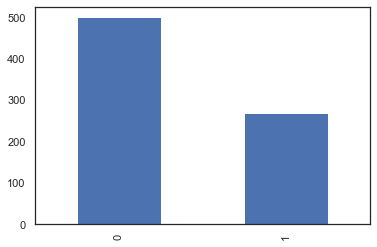

In [10]:
d_count.plot(kind="bar")

In [11]:
min_count = data['Outcome'].value_counts().values.min()
min_count

268

### Applying Undersampling 

In [12]:
data_no = data[data['Outcome']==0].sample(int(min_count))
data_yes = data[data['Outcome']==1]
data1 = data_yes.append(data_no).sample(len(data_yes)+len(data_no))
d2_count=data1['Outcome'].value_counts()
d2_count

0    268
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

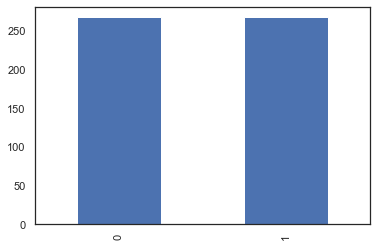

In [13]:
d2_count.plot(kind="bar")

## 3. Dealing with Outliers 

In [14]:
data2=data1

<AxesSubplot:>

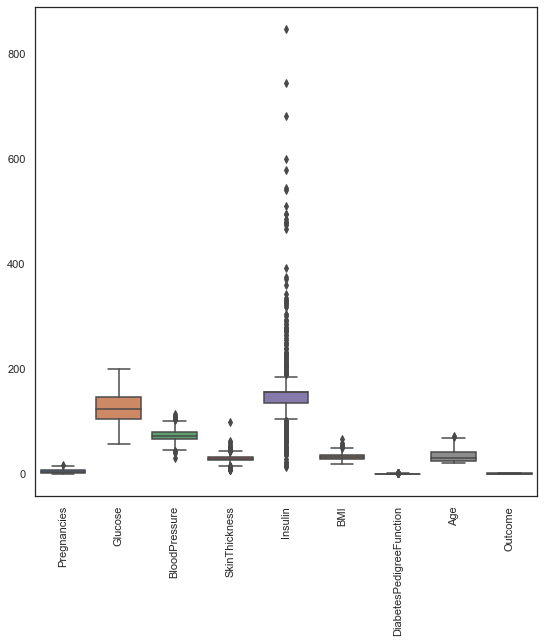

In [15]:
plt.figure(figsize=(9,9))
plt.xticks(rotation=90)
sns.boxplot(data=data2)

In [16]:
for outlier in ['Insulin','SkinThickness']:
    Q1 = np.percentile(data2[outlier],25)
    Q3 = np.percentile(data2[outlier],75)
    IQR = Q3-Q1
    UQR = Q3+1.5*IQR
    LQR = Q1 - 1.5*IQR
    data2 = data2.loc[(data2[outlier]>=LQR) & (data2[outlier]<=UQR)]
len(data2)

257

# Applying Models to check the accuracy
## Splitting Data into Training and Test Dataset

In [17]:
X = data2.iloc[:,:-1]
Y = data2.Outcome

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 25, stratify = Y)

### 1. Gaussian Naive Bayes

In [18]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
pred1 = classifier.predict(X_test)
pred2 = classifier.predict(X_train)
percent1 = round(accuracy_score(Y_train, pred2) * 100, 3)
percent2 = round(accuracy_score(Y_test, pred1) * 100, 3)
print("Train -> {:.3f}%".format(percent1))
print("Test -> {:.3f}%".format(percent2))

Train -> 72.067%
Test -> 76.923%


### 2. Decision Tree

In [19]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
pred1 = classifier.predict(X_test)
pred2 = classifier.predict(X_train)
percent1 = round(accuracy_score(Y_train, pred2) * 100, 3)
percent2 = round(accuracy_score(Y_test, pred1) * 100, 3)
print("Train -> {:.3f}%".format(percent1))
print("Test -> {:.3f}%".format(percent2))

Train -> 100.000%
Test -> 66.667%


### 3. Logistic Regression

In [21]:
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
pred1 = classifier.predict(X_test)
pred2 = classifier.predict(X_train)
percent1 = round(accuracy_score(Y_train, pred2) * 100, 3)
percent2 = round(accuracy_score(Y_test, pred1) * 100, 3)
print("Train -> {:.3f}%".format(percent1))
print("Test -> {:.3f}%".format(percent2))

Train -> 70.391%
Test -> 79.487%


C:\Users\manvi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 4. KNN

In [22]:
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
pred1 = classifier.predict(X_test)
pred2 = classifier.predict(X_train)
percent1 = round(accuracy_score(Y_train, pred2) * 100, 3)
percent2 = round(accuracy_score(Y_test, pred1) * 100, 3)
print("Train -> {:.3f}%".format(percent1))
print("Test -> {:.3f}%".format(percent2))

Train -> 81.564%
Test -> 69.231%


C:\Users\manvi\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\manvi\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Improving Accuracy of Models

### Feature Selection

In [23]:
fs = RandomForestClassifier(n_estimators=100, n_jobs=-1)
fs1 = sfs(fs, k_features=5, forward=True, floating=False, verbose=2, scoring='accuracy', cv=5)

fs1 = fs1.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   14.1s finished

[2021-12-30 14:40:41] Features: 1/5 -- score: 0.5919047619047618[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   12.3s finished

[2021-12-30 14:40:53] Features: 2/5 -- score: 0.692857142857143[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.5s finished

[2021-12-30 14:41:04] Features: 3/5 -- score: 0.7096825396825397[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

### Columns 0,1,4,5 & 6 are highly affecting the Outcome column.
### Dropping the irrelevant column to increase the accuracy of models

In [24]:
features = list(fs1.k_feature_idx_)
print(features)

[1, 3, 4, 5, 6]


In [25]:
d1=data2.drop(['Pregnancies','BloodPressure','Age'],axis=1)
d1

,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
284,108.0,29.15342,155.548223,27.0,0.259,1
63,141.0,34.00000,128.000000,25.4,0.699,0
357,129.0,30.00000,155.548223,39.9,0.569,1
222,119.0,29.15342,155.548223,25.2,0.209,0
148,147.0,29.15342,155.548223,33.7,0.218,0
...,...,...,...,...,...,...
731,120.0,29.15342,155.548223,28.4,0.259,1
708,164.0,29.15342,155.548223,32.8,0.148,1
201,138.0,29.15342,155.548223,40.1,0.236,0
419,129.0,29.00000,115.000000,26.4,0.219,1


In [26]:
X = d1.iloc[:,:-1]
Y = d1.Outcome

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 25, stratify = Y)

### 1. Bagging - Decision Tree

In [27]:
cls = DecisionTreeClassifier()
classifier = BaggingClassifier(base_estimator = cls, n_estimators = 84, random_state = 1000)
classifier.fit(X_train, Y_train)
pred1 = classifier.predict(X_test)
pred2 = classifier.predict(X_train)
percent1 = round(accuracy_score(Y_train, pred2) * 100, 3)
percent2 = round(accuracy_score(Y_test, pred1) * 100, 3)
print("Train -> {:.3f}%".format(percent1))
print("Test -> {:.3f}%".format(percent2))

Train -> 100.000%
Test -> 70.513%


### 2. Bagging - Random Forest 

In [147]:
classifier = RandomForestClassifier(n_estimators = 65)
classifier.fit(X_train, Y_train)
pred1 = classifier.predict(X_test)
pred2 = classifier.predict(X_train)
percent1 = round(accuracy_score(Y_train, pred2) * 100, 3)
percent2 = round(accuracy_score(Y_test, pred1) * 100, 3)
print("Train -> {:.3f}%".format(percent1))
print("Test -> {:.3f}%".format(percent2))

Train -> 100.000%
Test -> 73.077%


### 3. Bagging - Extra Trees 

In [62]:
classifier = ExtraTreesClassifier(n_estimators=1000, max_features=4, random_state=80)
classifier.fit(X_train, Y_train)
pred1 = classifier.predict(X_test)
pred2 = classifier.predict(X_train)
percent1 = round(accuracy_score(Y_train, pred2) * 100, 3)
percent2 = round(accuracy_score(Y_test, pred1) * 100, 3)
print("Train -> {:.3f}%".format(percent1))
print("Test -> {:.3f}%".format(percent2))

Train -> 100.000%
Test -> 71.795%


### 4. Boosting - Adaboost

In [63]:
classifier = AdaBoostClassifier(n_estimators=1000, random_state=85, algorithm='SAMME')
classifier.fit(X_train, Y_train)
pred1 = classifier.predict(X_test)
pred2 = classifier.predict(X_train)
percent1 = round(accuracy_score(Y_train, pred2) * 100, 3)
percent2 = round(accuracy_score(Y_test, pred1) * 100, 3)
print("Train -> {:.3f}%".format(percent1))
print("Test -> {:.3f}%".format(percent2))

C:\Users\manvi\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\manvi\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Train -> 91.620%
Test -> 71.795%


### 5. Boosting - Gradient Boosting 

In [64]:
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
classifier.fit(X_train, Y_train)
pred1 = classifier.predict(X_test)
pred2 = classifier.predict(X_train)
percent1 = round(accuracy_score(Y_train, pred2) * 100, 3)
percent2 = round(accuracy_score(Y_test, pred1) * 100, 3)
print("Train -> {:.3f}%".format(percent1))
print("Test -> {:.3f}%".format(percent2))

Train -> 91.620%
Test -> 71.795%


# Model Selection and Performance

In the above Diabetes dataset, we have predicted the Outcome for patients who have Diabetes or not. For which we have applied below algorithms and acquired the accuracies.

Step 1 : Imported the required Libraries

Step 2 : Data Preprocessing
         - Checking for Missing Values
         - Replacing Missing Values with Plausible values
         - Checking for Outliers
         - Managing Outliers with Inter Quantile Range process
         
Step 3 : Splitting data in Training and Test dataset
         - 30% dataset is for testing and 70% for training
         
Step 4 : Below models are applied for checking the accuracy:

1. Gaussian Naive Bayes:
   Training Accuracy : 70.950%
   Test Accuracy : 83.333%
   
2. Decision Tree:
   Training Accuracy : 100.000%
   Test Accuracy : 66.667%

3. Logistic Regression:
   Training Accuracy : 69.274%
   Test Accuracy : 79.487%
   
4. KNN:
   Training Accuracy : 72.067%
   Test Accuracy : 73.077%
   
   
Step 5 : Increasing Model Performance using Ensemble methods
We have applied Feature selection method to check what all features/columns highly impact 'Outcome' i.e. Target variable.
5 features are selected and ensemble methods are applied to increase the accuracy.

1. Bagging-Decision Tree:
   Training Accuracy : 100.000%
   Test Accuracy : 71.795%

2. Extra Trees:
   Training Accuracy : 100.000%
   Test Accuracy : 73.077%

2. Random Forest:
   Training Accuracy : 100.000%
   Test Accuracy : 79.487%
   
3. Boosting-Adaboost:
   Training Accuracy : 92.737%
   Test Accuracy : 66.667%

4. Gradient Boosting:
   Training Accuracy : 90.503%
   Test Accuracy : 69.231%
   
As per above models, we can go ahead with Bagging Random Forest with highest accuracy of 79.487% to predict if a patient will have Diabetes or not.
   
